
This dataset contains information about customers of a bank.
The dataset has 10,000 rows and 11 columns.
The columns in the dataset are as follows:
1. CreditScore: Credit score of the customer
2. Geography: The country of the customer
3. Gender: Gender of the customer
4. Age: Age of the customer
5. Tenure: Number of years the customer has been with the bank
6. Balance: Account balance of the customer
7. NumOfProducts: Number of products the customer has with the bank
8. HasCrCard: Whether the customer has a credit card (1 = Yes, 0 = No)
9. IsActiveMember: Whether the customer is an active member (1 = Yes, 0 = No)
10. EstimatedSalary: Estimated salary of the customer
11. Exited: Whether the customer has exited the bank (1 = Yes, 0 = No)

In [131]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_auc_score, roc_curve, auc,precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.models import load_model
import datetime
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the data
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# check duplicate values
df.duplicated().sum()

0

In [10]:
# drop the columns that are not needed
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exploratory Data Analysis

1 - Univariate Analysis ( based on the order of the columns will be explored)


CreditScore Column

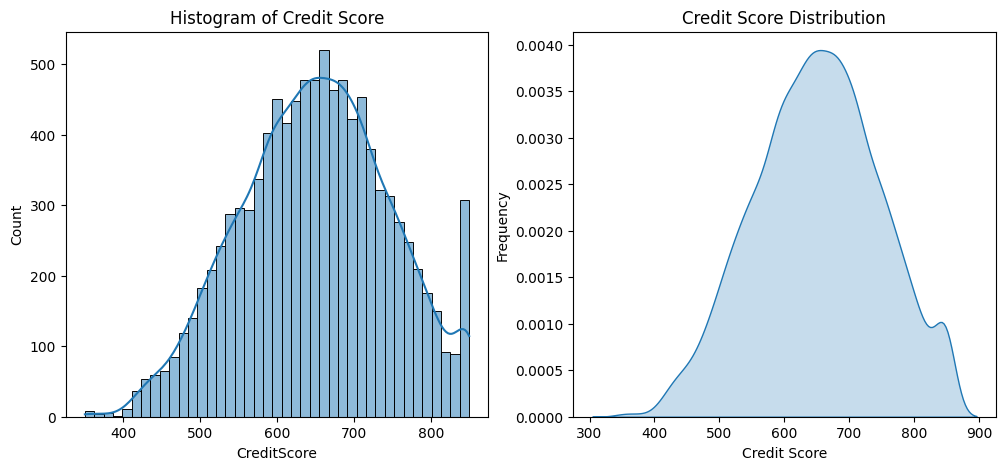

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.histplot(df['CreditScore'], kde=True, ax=ax[0])
sns.kdeplot(df['CreditScore'], fill=True, ax=ax[1])
ax[0].set_title('Histogram of Credit Score')
plt.xlabel('Credit Score')
ax[1].set_title('Credit Score Distribution')
plt.ylabel('Frequency')
plt.show()

In [13]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

The CreditScore column represents the credit score of the customers. The distribution of the credit scores is shown in the histogram and KDE plot. The histogram shows the frequency of different credit score values, while the KDE plot provides a smoothed estimate of the distribution.

From the plots, we can observe that the credit scores are approximately normally distributed, with most of the scores concentrated around the mean. The distribution is slightly skewed to the right, indicating that there are more customers with higher credit scores. The range of credit scores is from 350 to 850, with a mean around 650.

2 - Geopraphy Column

In [14]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

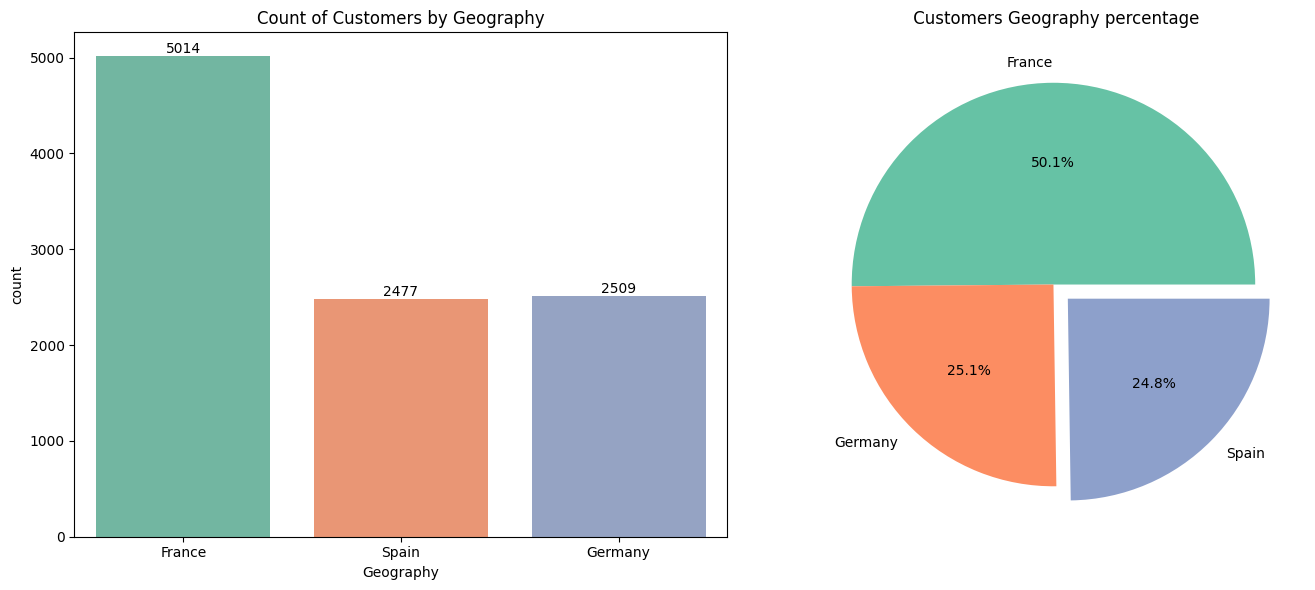

In [15]:
fig,ax = plt.subplots(1,2, figsize=(14,6))
sns.countplot(x='Geography', data=df, ax=ax[0], palette="Set2")

# Annotate values on top of each bar
for container in ax[0].containers:
    # Add labels on each bar
    ax[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

ax[0].set_title('Count of Customers by Geography')

# pie chart for Geography
plt.pie(df['Geography'].value_counts(), 
        labels=df['Geography'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette('Set2'), 
        explode=[0.0, 0.0, 0.1])

plt.title(' Customers Geography percentage')
plt.tight_layout()
plt.show()

The Geography columns shows that customers belong to three different countries, with France contribute the maximum number, a little more than 50% while Germany and Spain roughly represent one furth of the customers.

3 - Gender Column

In [16]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

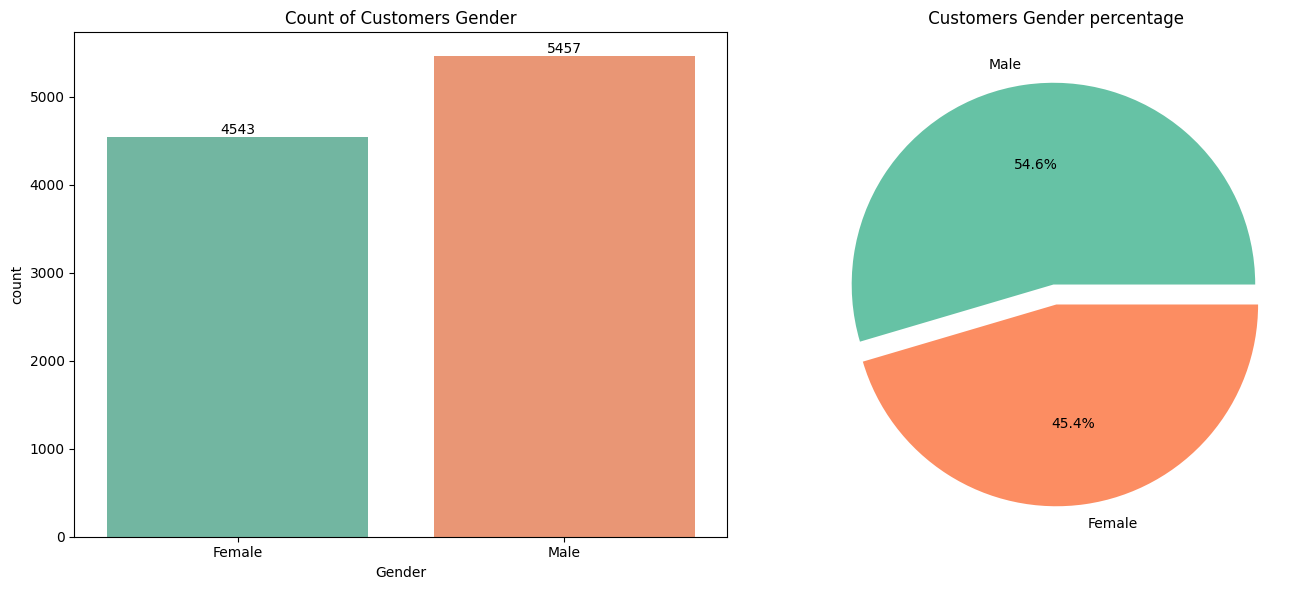

In [17]:
fig,ax = plt.subplots(1,2, figsize=(14,6))
sns.countplot(x='Gender', data=df, ax=ax[0], palette="Set2")

# Annotate values on top of each bar
for container in ax[0].containers:
    # Add labels on each bar
    ax[0].bar_label(container, fmt='%d', label_type='edge', fontsize=10)

ax[0].set_title('Count of Customers Gender')

# pie chart for Geography
plt.pie(df['Gender'].value_counts(), 
        labels=df['Gender'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette('Set2'), 
        explode=[0.0, 0.1])

plt.title(' Customers Gender percentage')
plt.tight_layout()
plt.show()

Gender column represents that customers are of two Genders of Male and Female in which Male customers outnumber the Females.

4 - Age Column

In [18]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

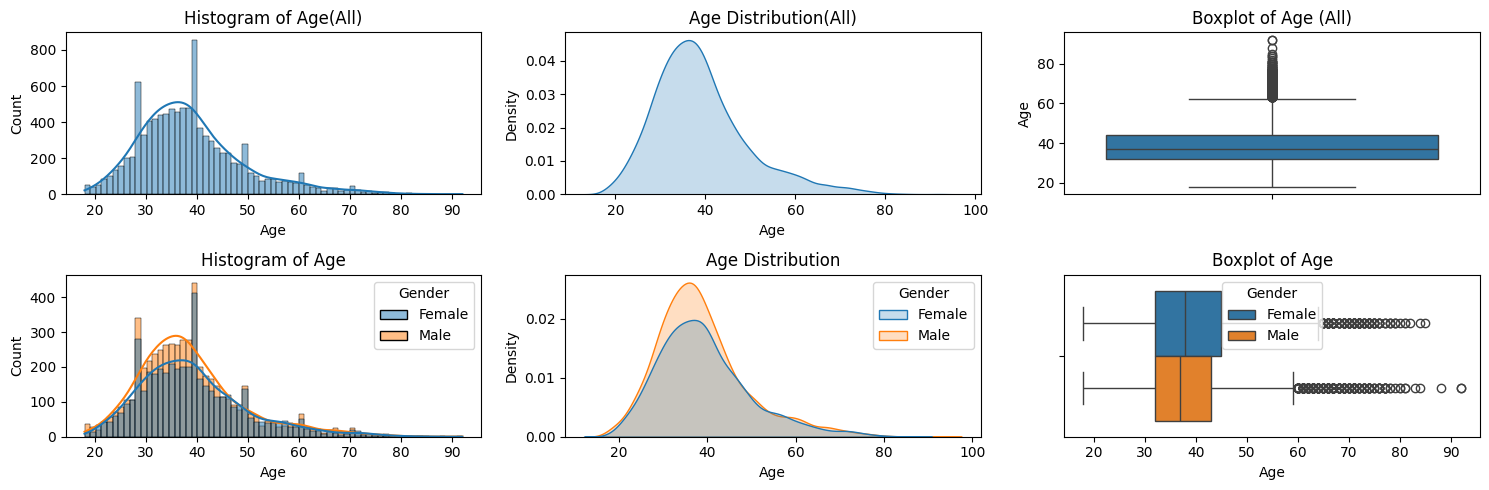

In [19]:
fig, ax = plt.subplots(2,3, figsize=(15, 5))
sns.histplot(df['Age'], kde=True, ax=ax[0,0])
sns.kdeplot(df['Age'], fill=True, ax=ax[0,1])
sns.boxplot(df['Age'], ax=ax[0,2])
sns.histplot(data=df, x='Age', hue='Gender', kde=True, ax=ax[1,0])
sns.kdeplot(data=df, x='Age', hue='Gender', fill=True, ax=ax[1,1])
sns.boxplot(data=df, x='Age', hue='Gender', ax=ax[1,2])
ax[0,0].set_title('Histogram of Age(All)')
ax[0,1].set_title('Age Distribution(All)')
ax[0,2].set_title('Boxplot of Age (All)')
ax[1,0].set_title('Histogram of Age')
ax[1,1].set_title('Age Distribution')
ax[1,2].set_title('Boxplot of Age')
plt.tight_layout()
plt.show()

The Age column represents the age of the customers. The distribution of the ages is shown in the histogram and KDE plot. The histogram shows the frequency of different age values, while the KDE plot provides a smoothed estimate of the distribution.

From the plots, we can observe that the ages are approximately normally distributed, with most of the ages concentrated around the mean. The distribution is slightly skewed to the right, indicating that there are more customers in the older age groups. The range of ages is from 18 to 92, with a mean around 38.


5- Tenure Column

In [20]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [21]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

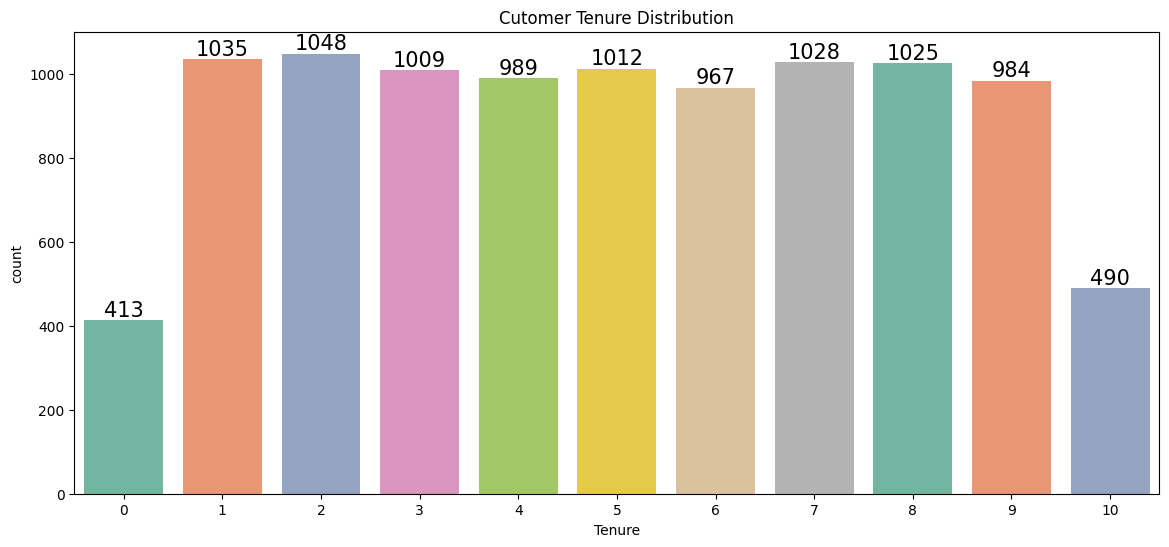

In [22]:
plt.figure(figsize=(14, 6))
plot=sns.countplot(data=df, x="Tenure",palette="Set2")
for container in plot.containers:
    # Add labels on each bar
    plot.bar_label(container, fmt='%d', label_type='edge', fontsize=15)
plt.title('Cutomer Tenure Distribution')
plt.show()

6 - Balance Column

In [23]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

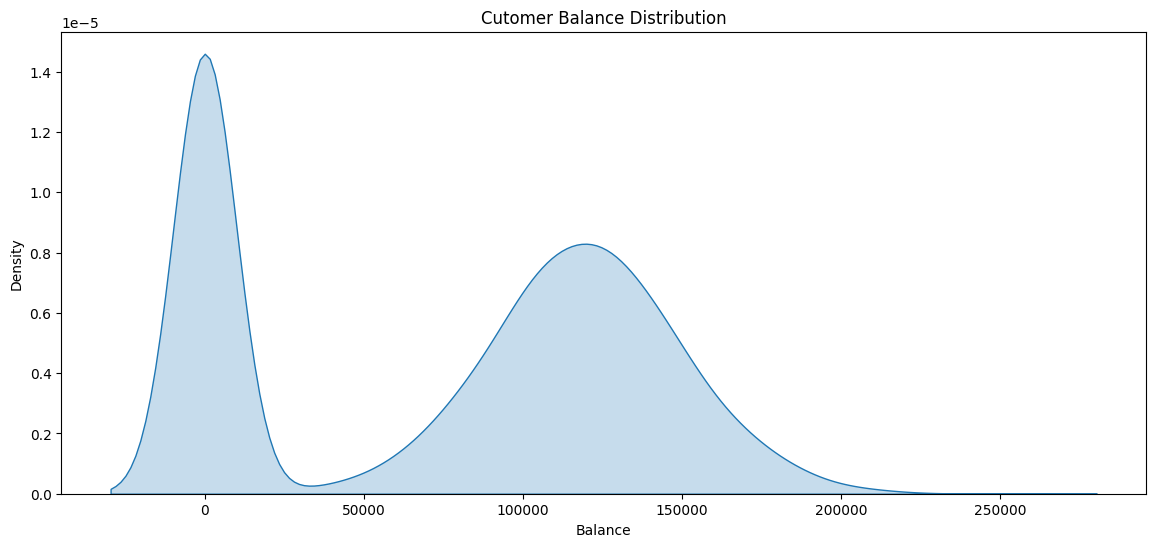

In [24]:
plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x="Balance", fill=True, palette="Set2")
plt.title('Cutomer Balance Distribution')
plt.show()

7 - NumberOfPoducts Column

In [25]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [26]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

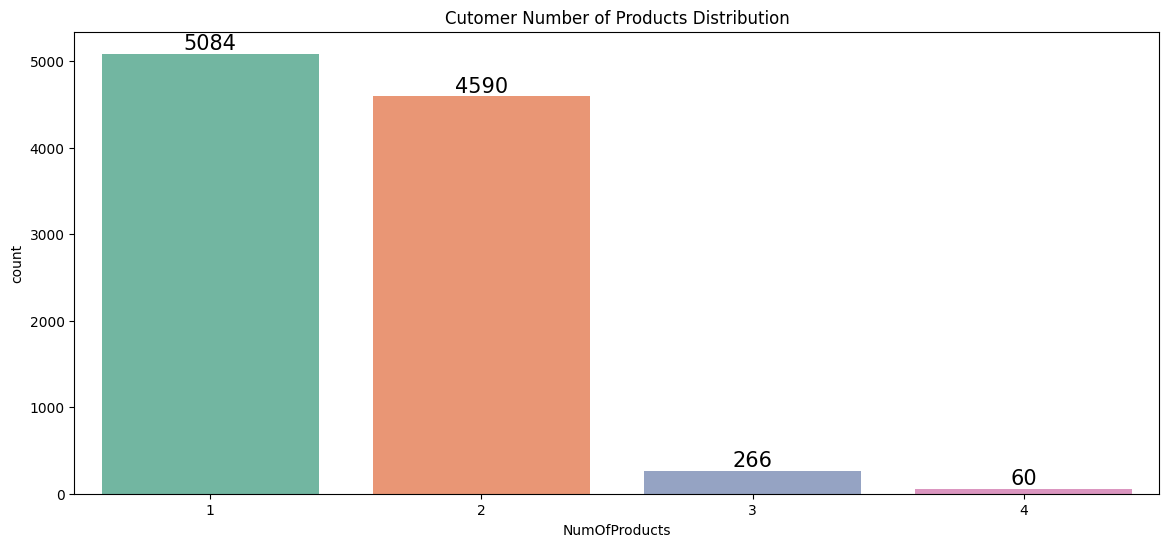

In [27]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="NumOfProducts",palette="Set2")
ax = plt.gca()  # Get the current axes
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=15)

plt.title('Cutomer Number of Products Distribution')
plt.show()

The NumOfProducts reveals that the highest product which customers engage with banks is product 1 and 2 whereas, the 3th and 4th product are having the least customers.

8 -  HasCrCard Column

In [28]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

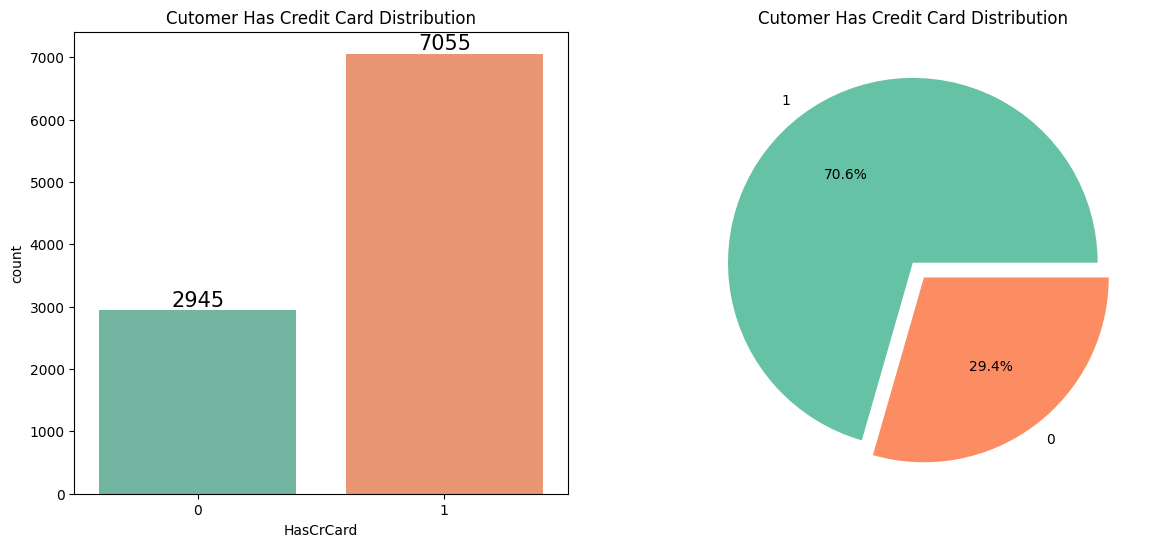

In [29]:
fig,ax = plt.subplots(1,2,figsize=(14, 6))
sns.countplot(data=df, x="HasCrCard",ax=ax[0], palette="Set2")
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', label_type='edge', fontsize=15)

plt.pie(df['HasCrCard'].value_counts(),
         labels=df['HasCrCard'].value_counts().index, 
         autopct='%1.1f%%', 
         colors=sns.color_palette('Set2'), 
         explode=[0.0, 0.1])
ax[0].set_title('Cutomer Has Credit Card Distribution')
ax[1].set_title('Cutomer Has Credit Card Distribution')
plt.show()

HasCrCard column depicts that over 70% of the customers posses credit card and around 30% do not have credit card.

9- IsActiveMember Column

In [30]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

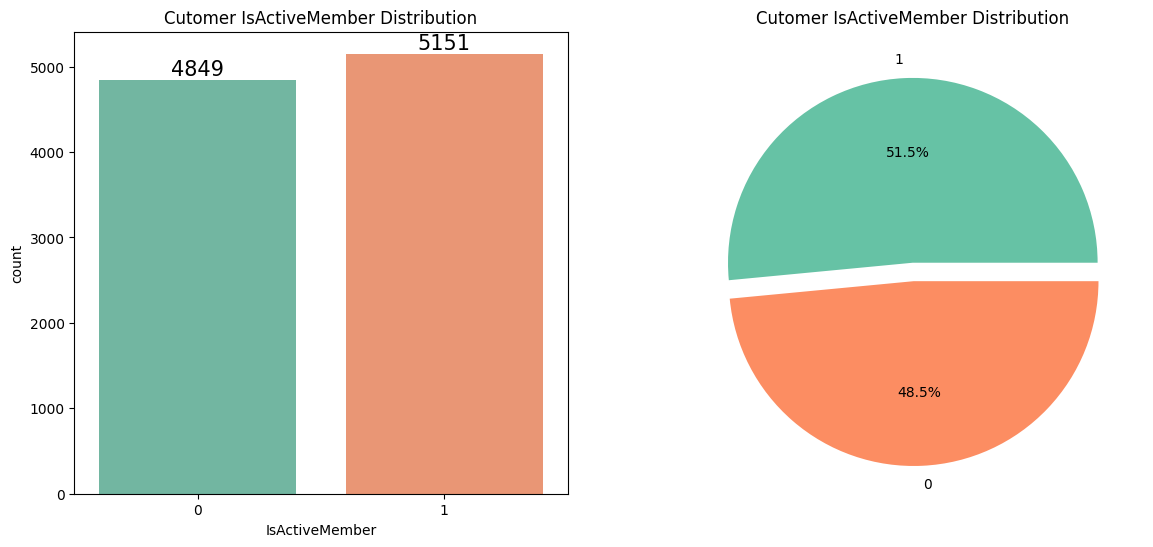

In [31]:
fig,ax = plt.subplots(1,2,figsize=(14, 6))
sns.countplot(data=df, x="IsActiveMember",ax=ax[0],palette="Set2")
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', label_type='edge', fontsize=15)

plt.pie(df['IsActiveMember'].value_counts(),
         labels=df['IsActiveMember'].value_counts().index, 
         autopct='%1.1f%%', 
         colors=sns.color_palette('Set2'), 
         explode=[0.0, 0.1])
ax[0].set_title('Cutomer IsActiveMember Distribution')
ax[1].set_title('Cutomer IsActiveMember Distribution')
plt.show()

From the Above count plot and pie chart it is evident that 51.5% of customers are currently active members of bank and 48.5% of them are not active member of the bank.

10 - EstimatedSalary Column

In [32]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

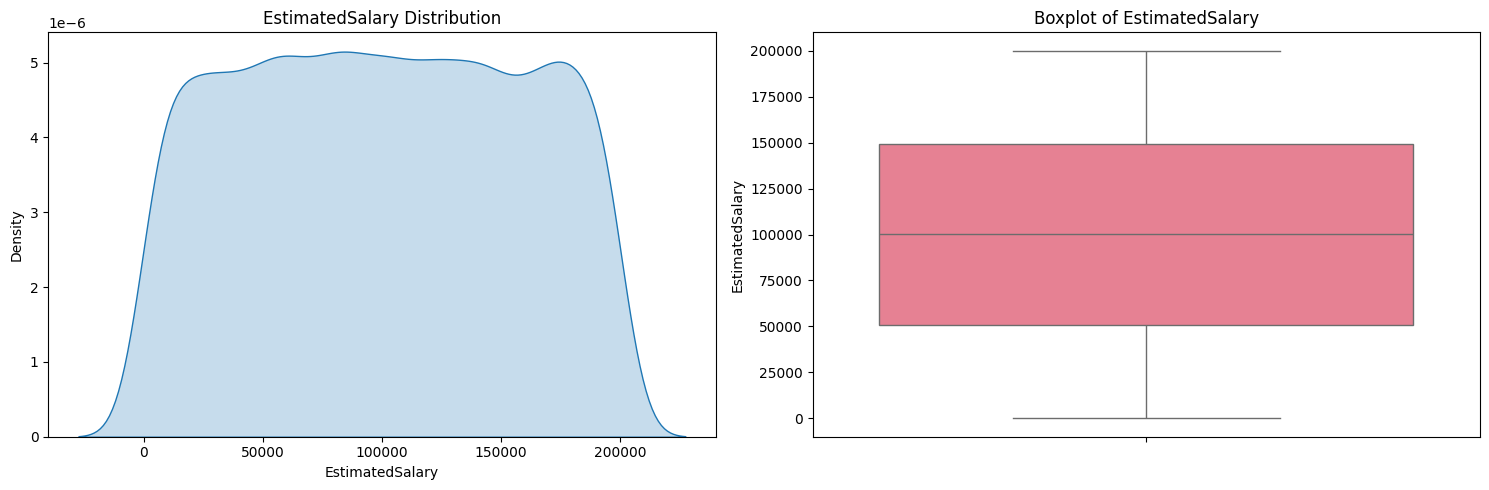

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.kdeplot(df['EstimatedSalary'], fill=True, ax=ax[0])
sns.boxplot(df['EstimatedSalary'], ax=ax[1],palette="husl")
ax[0].set_title('EstimatedSalary Distribution')
ax[1].set_title('Boxplot of EstimatedSalary')
plt.tight_layout()
plt.show()

11 - Exited Column ( target column)

In [34]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

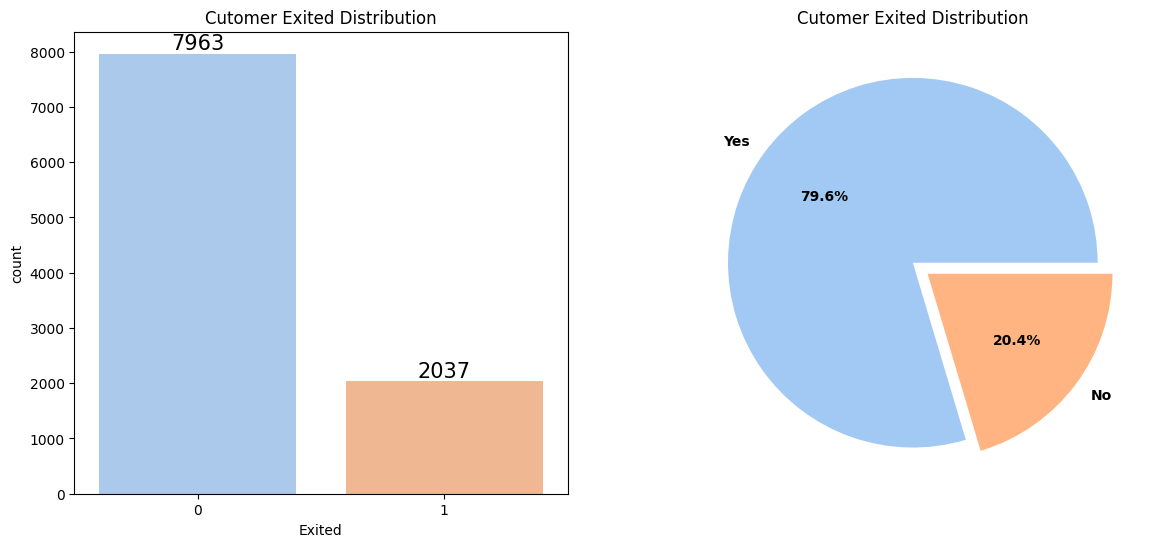

In [35]:
fig,ax = plt.subplots(1,2,figsize=(14, 6))
sns.countplot(data=df, x="Exited",ax=ax[0],palette="pastel")
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%d', label_type='edge', fontsize=15)

plt.pie(df['Exited'].value_counts(),
         labels=['Yes', 'No'], 
         autopct='%1.1f%%', 
         colors=sns.color_palette('pastel'), 
         textprops={"fontweight":"black"},
         explode=[0.0, 0.1])
ax[0].set_title('Cutomer Exited Distribution')
ax[1].set_title('Cutomer Exited Distribution')
plt.show()

Overall, 1/5 of the customer remained loyal to the bank whereas, roughly 80% of the customers quit to the bank.

Bivariate Analysis

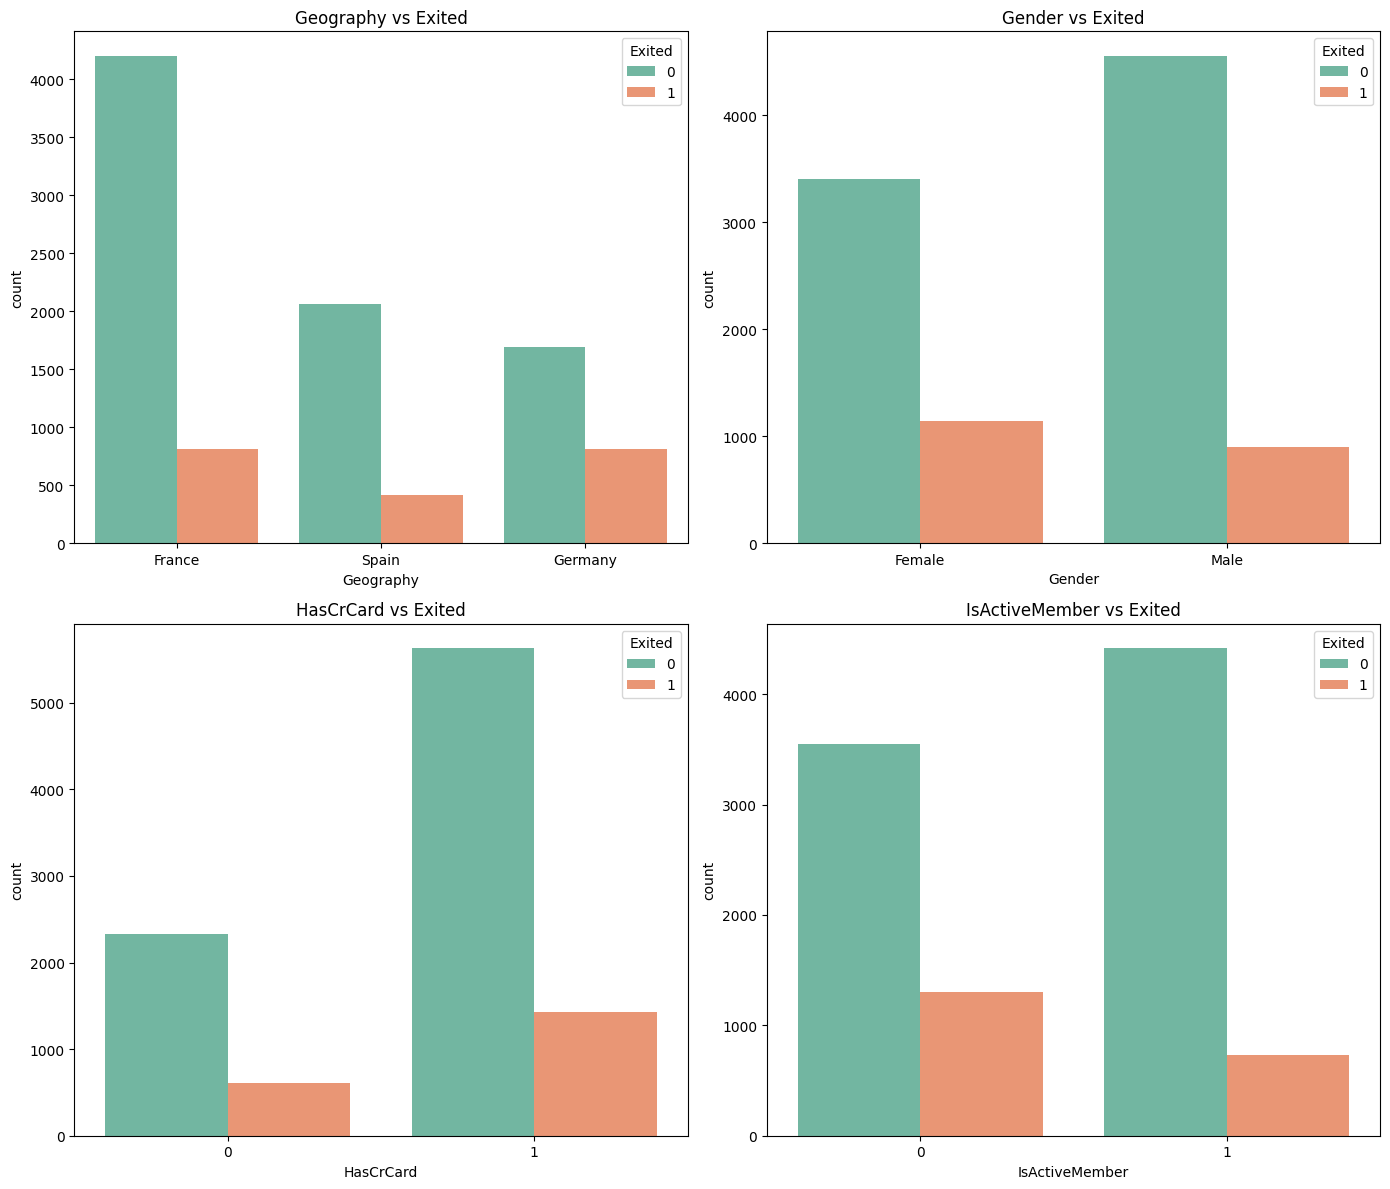

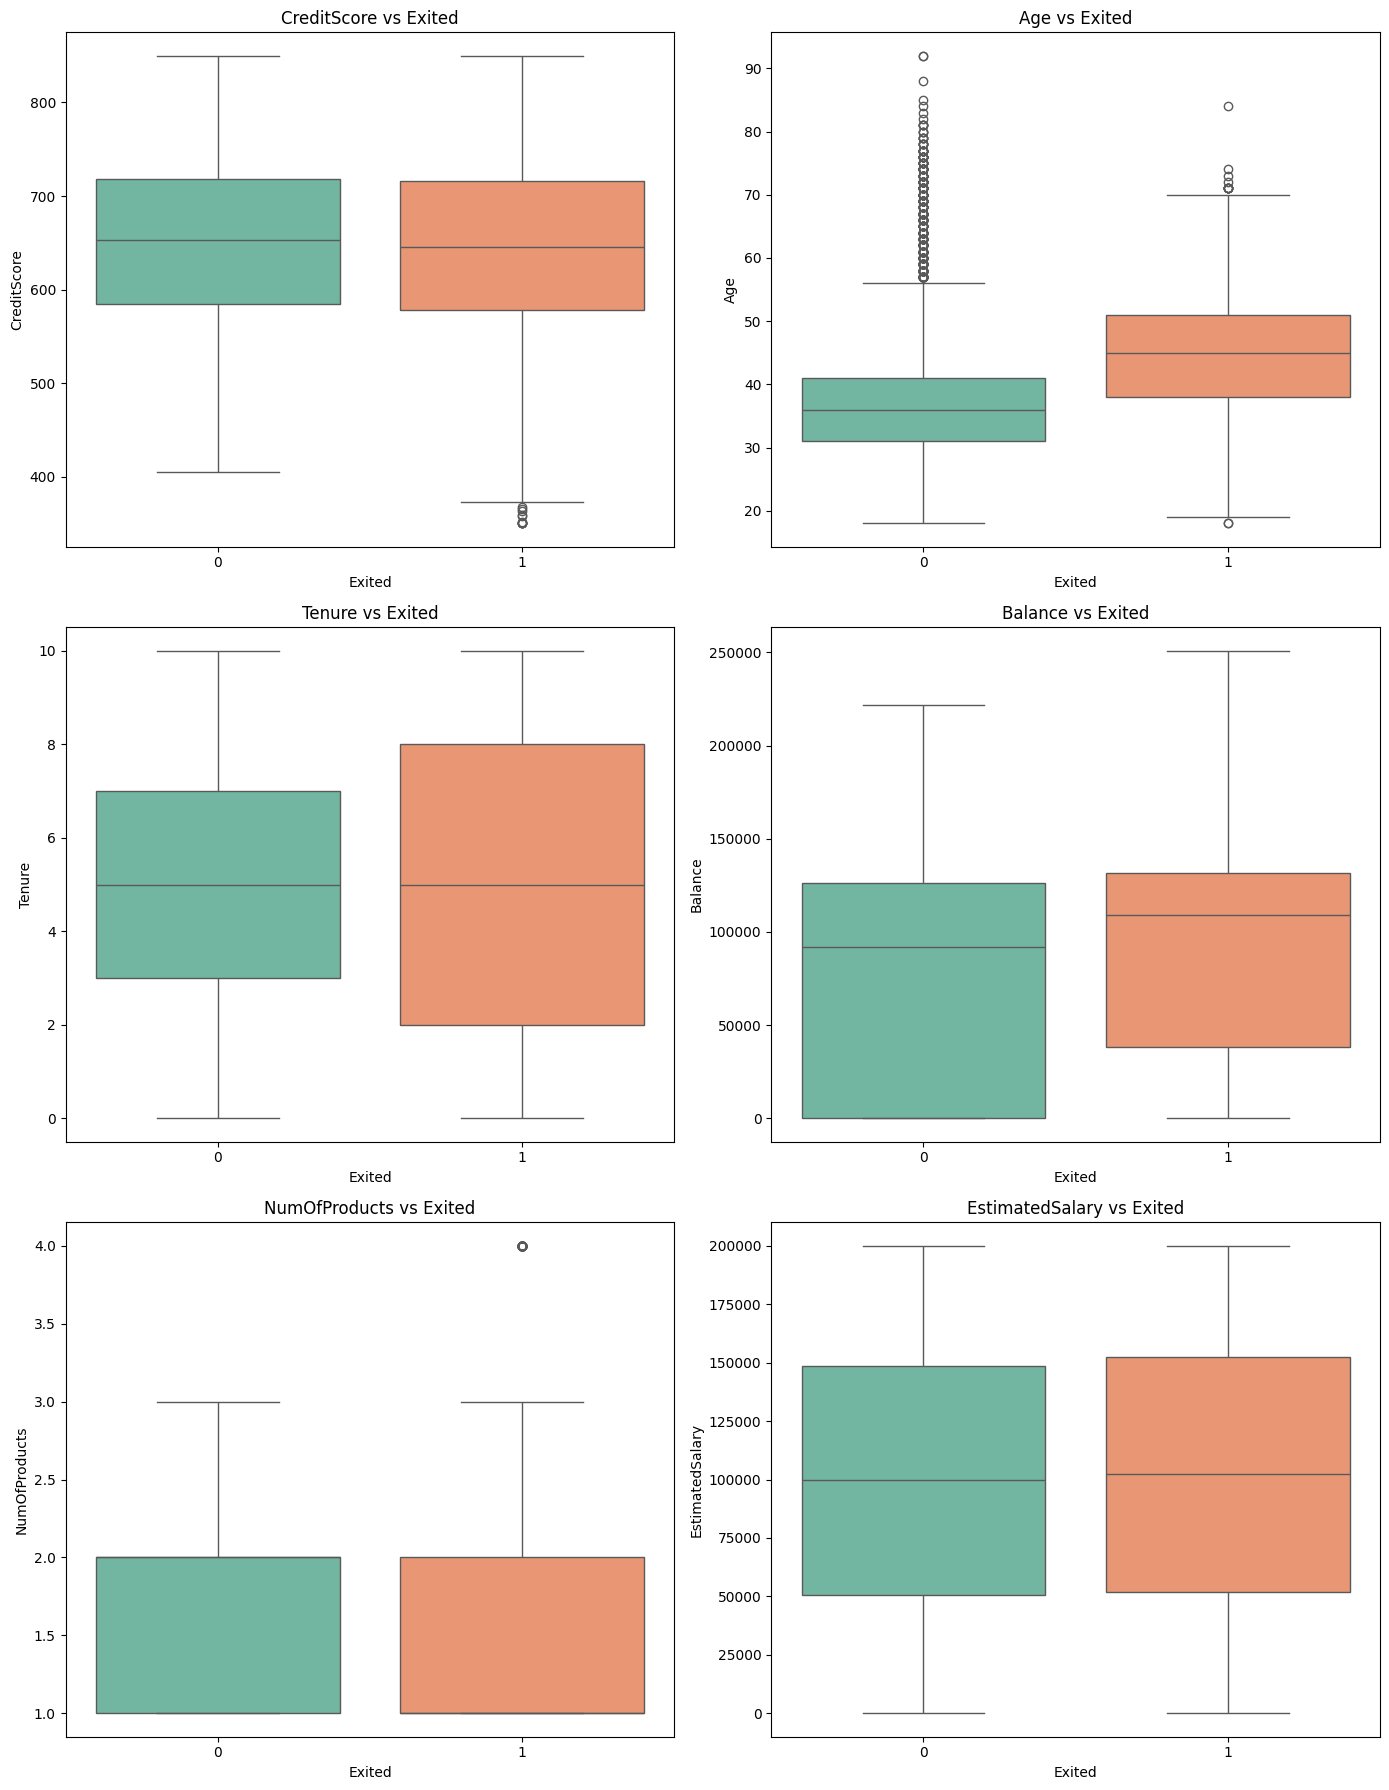

In [36]:
# Categorical Independent Variables
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.countplot(data=df, x='Geography', hue='Exited', ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('Geography vs Exited')

sns.countplot(data=df, x='Gender', hue='Exited', ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title('Gender vs Exited')

sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('HasCrCard vs Exited')

sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title('IsActiveMember vs Exited')

plt.tight_layout()
plt.show()

# Numerical Independent Variables
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

sns.boxplot(data=df, x='Exited', y='CreditScore', ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('CreditScore vs Exited')

sns.boxplot(data=df, x='Exited', y='Age', ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title('Age vs Exited')

sns.boxplot(data=df, x='Exited', y='Tenure', ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('Tenure vs Exited')

sns.boxplot(data=df, x='Exited', y='Balance', ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title('Balance vs Exited')

sns.boxplot(data=df, x='Exited', y='NumOfProducts', ax=axes[2, 0], palette="Set2")
axes[2, 0].set_title('NumOfProducts vs Exited')

sns.boxplot(data=df, x='Exited', y='EstimatedSalary', ax=axes[2, 1], palette="Set2")
axes[2, 1].set_title('EstimatedSalary vs Exited')

plt.tight_layout()
plt.show()

Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

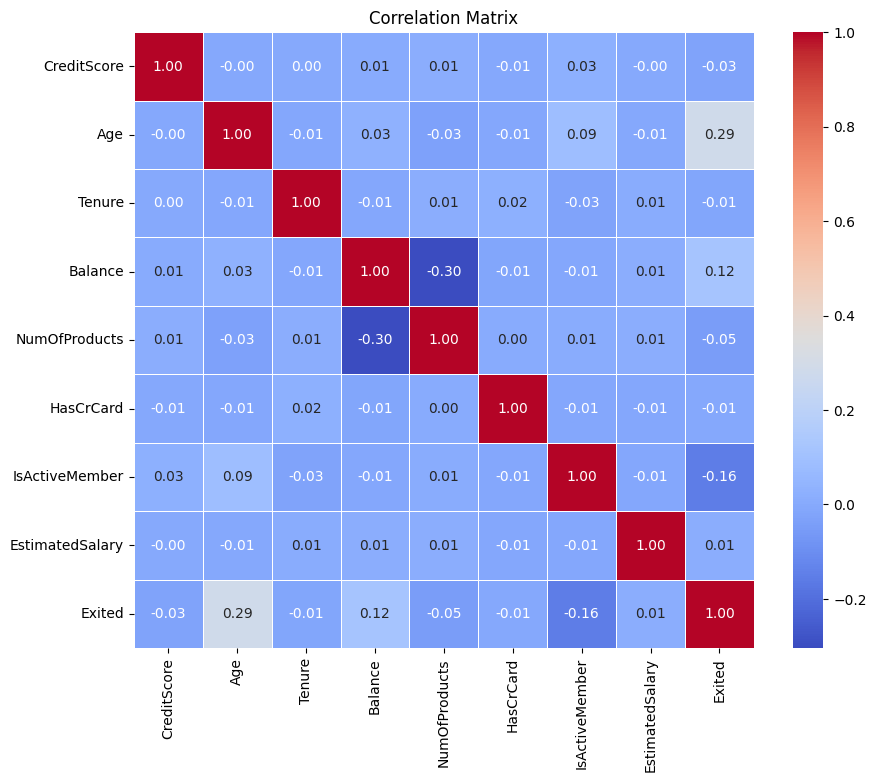

In [37]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Geography', 'Gender'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

Preprocessing

In [38]:
# Encode Geography variables
geography_ohe = OneHotEncoder()
geography_encoded = geography_ohe.fit_transform(df[['Geography']])

In [39]:
geography_ohe.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [40]:
geography_encoded_df = pd.DataFrame(geography_encoded.toarray(), columns=geography_ohe.get_feature_names_out(['Geography']))

In [41]:
geography_encoded_df.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [42]:
df = pd.concat([geography_encoded_df, df.drop(['Geography'], axis=1)], axis=1)

In [43]:
df.head()

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,699,Female,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
gender_le = LabelEncoder()
df['Gender'] = gender_le.fit_transform(df['Gender'])

In [45]:
df.tail()

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,1.0,0.0,0.0,771,1,39,5,0.00,2,1,0,96270.64,0
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,1.0,0.0,0.0,709,0,36,7,0.00,1,0,1,42085.58,1
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52,1
9999,1.0,0.0,0.0,792,0,28,4,130142.79,1,1,0,38190.78,0


In [46]:
## save the label encoder and one hot encoder
with open('encoder/label_encoder.pkl','wb') as f:
    pickle.dump(gender_le,f)

with open('encoder/one_hot_encoder.pkl','wb') as f:
    pickle.dump(geography_ohe,f)



In [47]:
# split the data to independent and dependent variables
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [48]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# save the scaler
with open('encoder/scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [51]:
# ML models for training
models = {
        
            "LogisticRegression":LogisticRegression(),
            'SVC':SVC(),
            'DecisionTreeClassifier':DecisionTreeClassifier(),
            'RandomForestClassifier':RandomForestClassifier(),
            'KNeighborsClassifier':KNeighborsClassifier(),
            'BaggingClassifier':BaggingClassifier(),
            'ExtraTreesClassifier':ExtraTreesClassifier(),
            'AdaBoostClassifier':AdaBoostClassifier(),
            'XGBClassifier':XGBClassifier(),
            'CatBoostClassifier':CatBoostClassifier(),
            'LGBMClassifier':LGBMClassifier()

}

In [52]:
def model_report(y_true, y_pred):
    """
    Function to print the model report 
    Args:
    y_true: the actual values
    y_pred: the predicted values
    
    """
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', linewidths=4, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # print(f"Classification Report: \n{classification_report(y_true, y_pred)}")

In [53]:
def train_models(model, X_train, y_train):
    """
    Function to train the model
    Args:
    model: the model used
    X_train: the training data
    y_train: the target data
    Returns:
    model: the trained model
    """
    model.fit(X_train, y_train)
    return model

In [54]:
def evaluate_model(true_data, predicted_data):
   """
   Function to evaluate the model
   Args:
   true_data: the actual values
   predicted_data: the predicted values
   Returns:
   accuracy: the accuracy of the model
   precision: the precision of the model
   recall: the recall of the model
   """
   
   accuracy =  accuracy_score(true_data,predicted_data) 
   precision =  precision_score(true_data,predicted_data) 
   recall =  recall_score(true_data,predicted_data) 
   return  (accuracy, precision, recall)

LogisticRegression
------------------------------
Testing Metrics: 
 Accuracy: 0.81
 Precision: 0.55
 Recall": 0.20


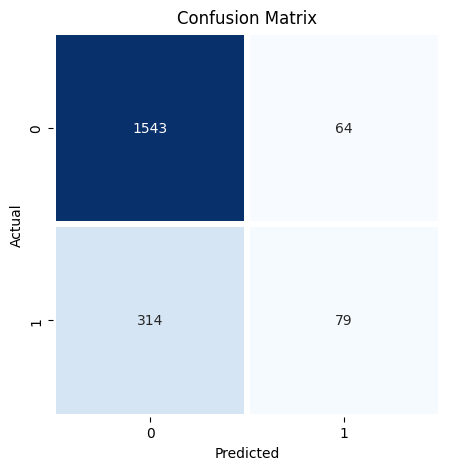

SVC
------------------------------
Testing Metrics: 
 Accuracy: 0.86
 Precision: 0.77
 Recall": 0.38


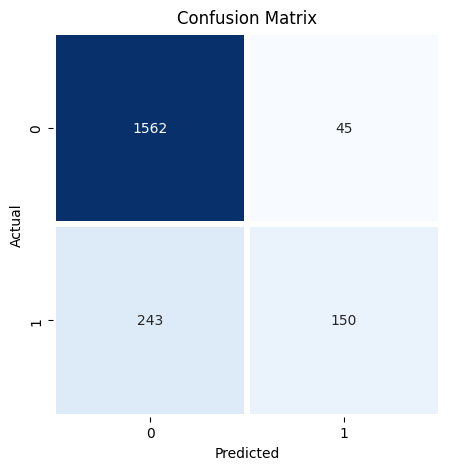



DecisionTreeClassifier
------------------------------
Testing Metrics: 
 Accuracy: 0.78
 Precision: 0.45
 Recall": 0.51


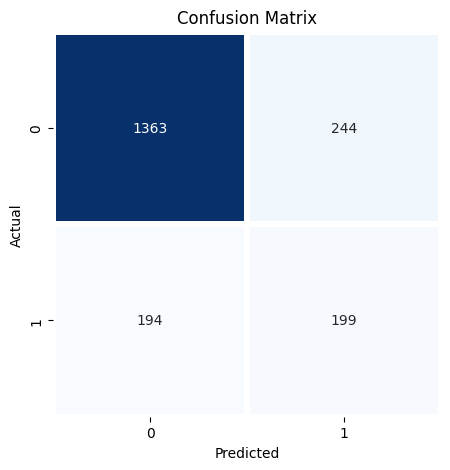



RandomForestClassifier
------------------------------
Testing Metrics: 
 Accuracy: 0.86
 Precision: 0.75
 Recall": 0.46


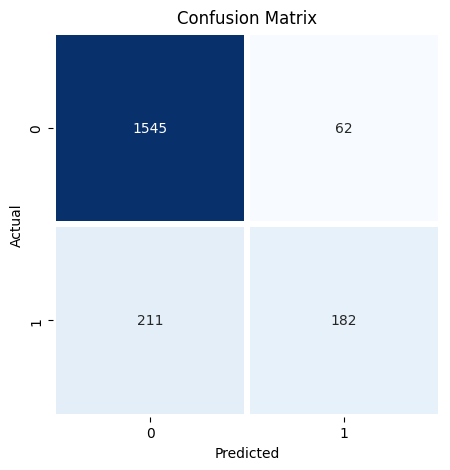



KNeighborsClassifier
------------------------------
Testing Metrics: 
 Accuracy: 0.83
 Precision: 0.61
 Recall": 0.37


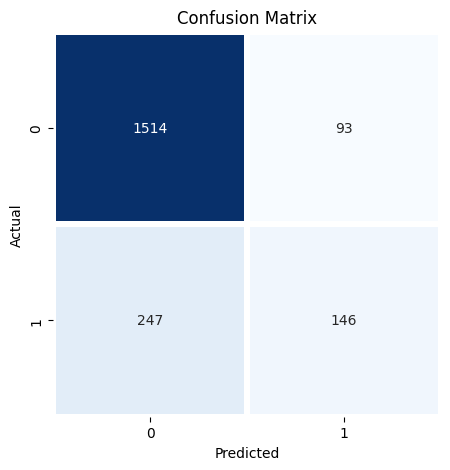



BaggingClassifier
------------------------------
Testing Metrics: 
 Accuracy: 0.85
 Precision: 0.70
 Recall": 0.46


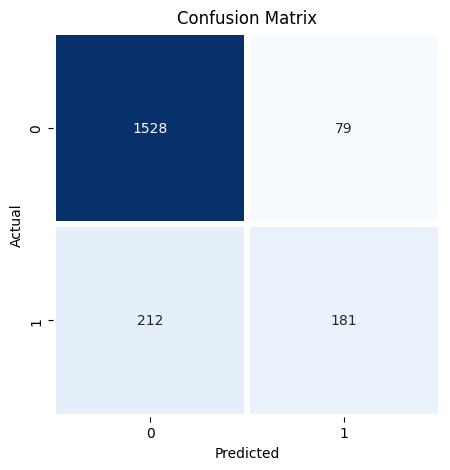



ExtraTreesClassifier
------------------------------
Testing Metrics: 
 Accuracy: 0.86
 Precision: 0.75
 Recall": 0.45


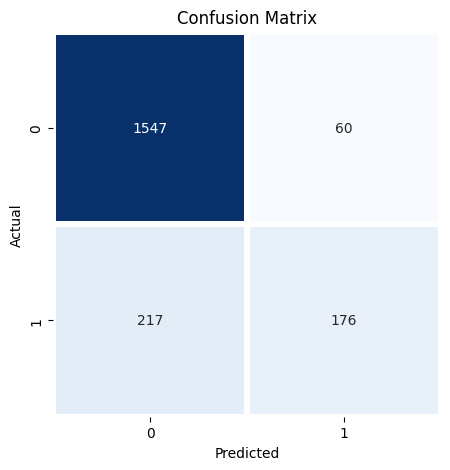



AdaBoostClassifier
------------------------------
Testing Metrics: 
 Accuracy: 0.86
 Precision: 0.73
 Recall": 0.45


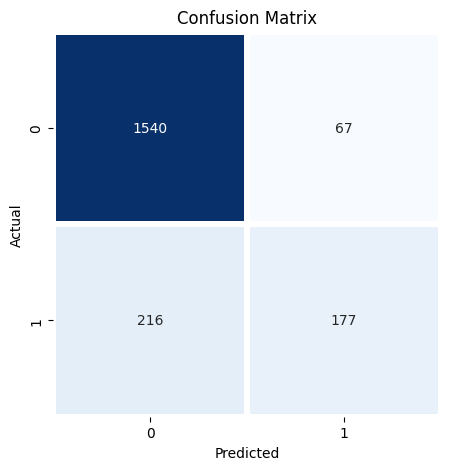



XGBClassifier
------------------------------
Testing Metrics: 
 Accuracy: 0.86
 Precision: 0.71
 Recall": 0.51


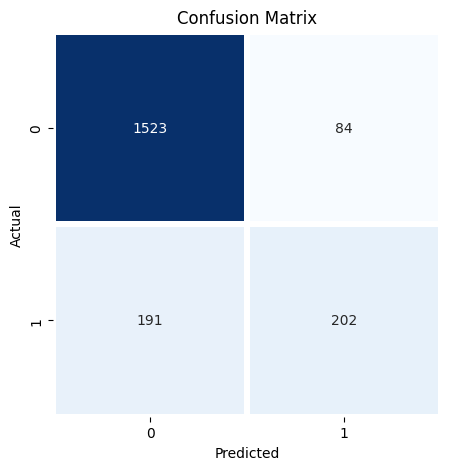



Learning rate set to 0.025035
0:	learn: 0.6721333	total: 166ms	remaining: 2m 45s
1:	learn: 0.6526666	total: 176ms	remaining: 1m 27s
2:	learn: 0.6337810	total: 183ms	remaining: 1m
3:	learn: 0.6169213	total: 189ms	remaining: 47s
4:	learn: 0.6011406	total: 195ms	remaining: 38.8s
5:	learn: 0.5866775	total: 200ms	remaining: 33.2s
6:	learn: 0.5758969	total: 206ms	remaining: 29.3s
7:	learn: 0.5623277	total: 212ms	remaining: 26.3s
8:	learn: 0.5493161	total: 218ms	remaining: 24s
9:	learn: 0.5378766	total: 224ms	remaining: 22.2s
10:	learn: 0.5270623	total: 229ms	remaining: 20.6s
11:	learn: 0.5173556	total: 235ms	remaining: 19.3s
12:	learn: 0.5076431	total: 241ms	remaining: 18.3s
13:	learn: 0.4984501	total: 246ms	remaining: 17.3s
14:	learn: 0.4897844	total: 252ms	remaining: 16.5s
15:	learn: 0.4812581	total: 259ms	remaining: 15.9s
16:	learn: 0.4755457	total: 264ms	remaining: 15.3s
17:	learn: 0.4679560	total: 270ms	remaining: 14.7s
18:	learn: 0.4622932	total: 276ms	remaining: 14.3s
19:	learn: 0.4

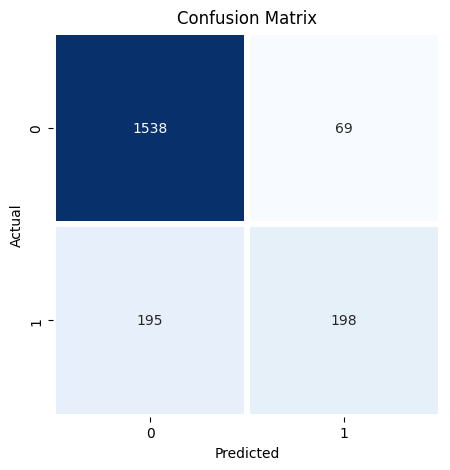



[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
LGBMClassifier
------------------------------
Testing Metrics: 
 Accuracy: 0.87
 Precision: 0.74
 Recall": 0.51


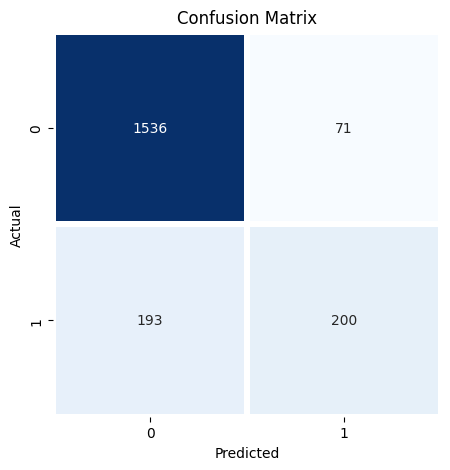

In [55]:
models_list = {}

for name, value in models.items():
    model = value
    model = train_models(model, X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy, precision, recall = evaluate_model(y_test, y_pred)
    models_list[name] = {'accuracy':accuracy, 'precision':precision, 'recall':recall}

    with open(f'models/{name}.pkl','wb') as f:
        pickle.dump(model,f)
        
    print(name)
    print("-"*30)
    print('Testing Metrics: ')
    print(f' Accuracy: {accuracy:.2f}')
    print(f' Precision: {precision:.2f}')
    print(f' Recall": {recall:.2f}')
    print("="*30)
    model_report(y_test,y_pred)
    print('\n')

In [56]:
print(models_list)

{'LogisticRegression': {'accuracy': 0.811, 'precision': 0.5524475524475524, 'recall': 0.2010178117048346}, 'SVC': {'accuracy': 0.856, 'precision': 0.7692307692307693, 'recall': 0.3816793893129771}, 'DecisionTreeClassifier': {'accuracy': 0.781, 'precision': 0.4492099322799097, 'recall': 0.5063613231552163}, 'RandomForestClassifier': {'accuracy': 0.8635, 'precision': 0.7459016393442623, 'recall': 0.4631043256997455}, 'KNeighborsClassifier': {'accuracy': 0.83, 'precision': 0.6108786610878661, 'recall': 0.37150127226463103}, 'BaggingClassifier': {'accuracy': 0.8545, 'precision': 0.6961538461538461, 'recall': 0.46055979643765904}, 'ExtraTreesClassifier': {'accuracy': 0.8615, 'precision': 0.7457627118644068, 'recall': 0.44783715012722647}, 'AdaBoostClassifier': {'accuracy': 0.8585, 'precision': 0.7254098360655737, 'recall': 0.45038167938931295}, 'XGBClassifier': {'accuracy': 0.8625, 'precision': 0.7062937062937062, 'recall': 0.5139949109414759}, 'CatBoostClassifier': {'accuracy': 0.868, 'pre

In [58]:
model_report = pd.DataFrame(models_list).T

In [59]:
model_report

,accuracy,precision,recall
LogisticRegression,0.8110,0.552448,0.201018
SVC,0.8560,0.769231,0.381679
DecisionTreeClassifier,0.7810,0.449210,0.506361
RandomForestClassifier,0.8635,0.745902,0.463104
KNeighborsClassifier,0.8300,0.610879,0.371501
BaggingClassifier,0.8545,0.696154,0.460560
ExtraTreesClassifier,0.8615,0.745763,0.447837
AdaBoostClassifier,0.8585,0.725410,0.450382
XGBClassifier,0.8625,0.706294,0.513995
CatBoostClassifier,0.8680,0.741573,0.503817


Building an Artificial Neural Network Classifier

In [62]:
# ANN neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# create a tensorboard callback
log_dir = 'logs/fit/'+ datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [66]:
# create an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [67]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback, early_stopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7447 - loss: 0.5308 - val_accuracy: 0.8350 - val_loss: 0.4019
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8391 - loss: 0.3911 - val_accuracy: 0.8540 - val_loss: 0.3533
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8453 - loss: 0.3662 - val_accuracy: 0.8585 - val_loss: 0.3472
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8544 - loss: 0.3484 - val_accuracy: 0.8605 - val_loss: 0.3409
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8699 - loss: 0.3312 - val_accuracy: 0.8580 - val_loss: 0.3427
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8591 - loss: 0.3341 - val_accuracy: 0.8615 - val_loss: 0.3385
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8656 - loss: 0.3242 - val_accuracy: 0.8645 - val_loss: 0.3394
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8644 - loss: 0.3264 - val_accu

In [68]:
model.save('models/ann_model.h5')

In [69]:
# Load tensorboard
%load_ext tensorboard

In [71]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 11644), started 0:07:24 ago. (Use '!kill 11644' to kill it.)

In [197]:
# prediction on the user data
def predict_churn(data):
    """
    Function to predict the churn
    Args:
    data: the user data
    Returns:
    prediction: the prediction of the model
    """

    models_predictions = []
    model_names = []

    # load the models
    models = os.listdir('models/')

    for model in models:
        model_name = model.split('.')[0]
        if model.endswith('.h5'):
            model = load_model(f'models/{model}')
            prediction = model.predict(data)
            if prediction[0][0] > 0.5:
                models_predictions.append(1)
            else:
                models_predictions.append(0)  
        else:
            with open(f'models/{model}', 'rb') as f:
                model = pickle.load(f)
            prediction = model.predict(data)
            models_predictions.append(prediction[0])
        model_names.append(model_name)

    return pd.DataFrame({'Model':model_names,'Prediction':models_predictions})


In [198]:
def preprocess_data(data):
    """
    Function to preprocess the data
    Args:
    data: the user data
    Returns:
    df: the preprocessed data
    """
    # load the scaler
    with open('encoder/scaler.pkl','rb') as f:
        scaler = pickle.load(f)
    # load the label encoder
    with open('encoder/label_encoder.pkl','rb') as f:
        label_encoder = pickle.load(f)
    # load the one hot encoder
    with open('encoder/one_hot_encoder.pkl','rb') as f:
        one_hot_encoder = pickle.load(f)
    
    # convert the data to dataframe
    df = pd.DataFrame(data, index=[0])
    # label encode the Gender column
    df['Gender'] = label_encoder.transform(df['Gender'])
    # one hot encode the Geography column
    geography_encoded = one_hot_encoder.transform(df[['Geography']])
    # convert the one hot encoded data to dataframe
    geography_encoded_df = pd.DataFrame(geography_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['Geography']))
    # drop the Geography column
    df.drop(['Geography'], axis=1, inplace=True)
    # concatenate the dataframes
    df = pd.concat([geography_encoded_df,df], axis=1)
    # scale the data
    df = scaler.transform(df)
    return df

In [199]:
# user input data
input_data = {
    'CreditScore': 600,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 40,
    'Tenure': 3,
    'Balance': 60000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 50000
}

In [202]:
# preprocess the data
preprocessed_data = preprocess_data(input_data)
# predict the churn
df = predict_churn(preprocessed_data)

11

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


11

In [203]:
df

,Model,Prediction
0,AdaBoostClassifier,0
1,ann_model,0
2,BaggingClassifier,0
3,CatBoostClassifier,0
4,DecisionTreeClassifier,0
5,ExtraTreesClassifier,0
6,KNeighborsClassifier,0
7,LGBMClassifier,0
8,LogisticRegression,0
9,RandomForestClassifier,0
